# Setup
mail : hakim.si-mohammed@inria.fr

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy

## Parser

In [2]:
# import argparse

# parser = argparse.ArgumentParser(description='Eeg interpretation')
# parser.add_argument('folder', help='folder of the eeg')

# args = parser.parse_args()
# print(args.folder)

# Code

In [3]:
eeg = pd.read_csv('eeg_file.csv')
eeg

Time:256Hz  Epoch  O1(micro volt)  Event Id  Event Date  Event Duration
0       0.000000      0       -4.922456   33025.0       0.001             0.0
1       0.003909      0        8.334373   32779.0       0.004             0.0
2       0.007818      0        3.134379       NaN         NaN             NaN
3       0.011726      0        5.175865       NaN         NaN             NaN
4       0.015635      0        2.509582       NaN         NaN             NaN
...          ...    ...             ...       ...         ...             ...
1531    5.984365      0       -3.076895       NaN         NaN             NaN
1532    5.988274      0       -3.027867       NaN         NaN             NaN
1533    5.992182      0        2.571069       NaN         NaN             NaN
1534    5.996091      0       -5.160759   32780.0       5.997             0.0
1535    6.000000      0       13.294775   32770.0       6.000             0.0

[1536 rows x 6 columns]

In [4]:
def smooth_triangle(data, degree):
    triangle=np.concatenate((np.arange(degree + 1), np.arange(degree)[::-1])) # up then down
    smoothed=[]

    for i in range(degree, len(data) - degree * 2):
        point=data[i:i + len(triangle)] * triangle
        smoothed.append(np.sum(point)/np.sum(triangle))
    # Handle boundaries
    smoothed=[smoothed[0]]*int(degree + degree/2) + smoothed
    while len(smoothed) < len(data):
        smoothed.append(smoothed[-1])
    return smoothed

Débuts, fins: [   1  513 1025] [ 511 1023 1534]
signal len (512,)
Max frequency: 15.0
signal len (512,)
Max frequency: 10.0
signal len (511,)
Max frequency: 12.023483365949119


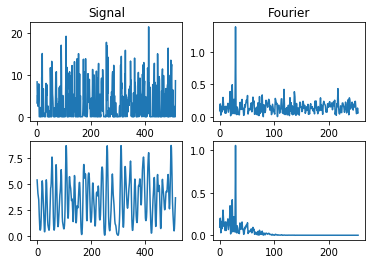

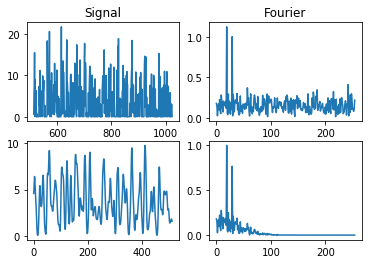

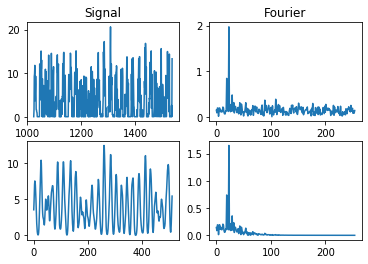

In [5]:
eeg.loc[:,'O1(micro volt)']
sampling_freq = 256

starts = np.where(eeg.loc[:,'Event Id'].values == 32779.0)[0]
ends = np.where(eeg.loc[:,'Event Id'].values == 32780.0)[0]
print('Débuts, fins:', starts, ends)
for i in range(len(starts)):
    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    ax1.title.set_text('Signal')
    ax2.title.set_text('Fourier')
#     ax3.title.set_text('Filtered')
#     ax4.title.set_text('Fourier Filtered')
    
    signal = eeg.loc[starts[i]:ends[i]+1,'O1(micro volt)']
    print('signal len', signal.shape)
    signal[signal<0] = 0 # remove neg values
    
    
    fourier = abs(np.fft.fft(signal))[0:sampling_freq] # abs peut-être inutile
    fourier = (fourier) / len(signal)

    ax1.plot(signal)
    ax2.plot(fourier[1:])
    
    
#     filtered = smooth_triangle(signal,2)
    filtered = scipy.ndimage.gaussian_filter(signal,2)
    
    ax3.plot(filtered)
    fourier_filt = abs(np.fft.fft(filtered))[0:sampling_freq]
    fourier_filt = (fourier_filt) / len(signal)
    ax4.plot(fourier_filt[1:])


    peaks = scipy.signal.find_peaks(fourier_filt, height=0)
#     print(peaks)
    ratio_len_sampling = len(signal) / sampling_freq # ratio between length of signal and sampling frequency
    print('Max frequency:', peaks[0][np.argmax(peaks[1]['peak_heights'])] / ratio_len_sampling)